# E4 - Seaborn

### What are the most popular stations in the city? 
### What are the busiest months and is there a weather component at play?
### What are the most popular trips between stations? 
### Are the existing stations evenly distributed?


The first question - “What are the most popular stations in the city?” - has an easy answer - we simply need a list of the 10 or 20 most popular start stations in the city. As this variable is a categorical one, a **bar chart** would suit our purposes best. A bar chart is one of the most common forms of visualizations because it’s very straightforward to interpret from anyone regardless of their background. 

Onto the second question - regarding when the most trips are taken and how this is connected to weather - we’d need a yearly overview of the trips month by month. Time series are best plotted on a **line chart**, hence we could plot the sum of the bike trips for each month as one line and combine it with the average temperature monthly as a second line on the plot. This will also show us whether there’s a relationship between temperature and bike usage. This is important because right now, the business strategy development isn’t clear whether the demand problem is a seasonal one or not. 


Bar Chart
    Find top 20 starting stations' frequencies
Line Chart
     Recreate dual axis line plot
          Create 2 dataframes and merge them
              AvgTemp-vs-Date :df_no_dups
              Ride_ID (bike_trips_count)-vs-Date :df_group
          Merge the 2 dataframes
               Ensure that both dataframes have same date format


In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime as dt
import seaborn as sns

In [2]:
#import data

df = pd.read_csv('NY_data_sample.csv', index_col = 0)

C:\Users\Barb\AppData\Local\Temp\ipykernel_4364\1702794093.py:3: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('NY_data_sample.csv', index_col = 0)


In [3]:
df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
date                   object
avgTemp               float64
_merge                 object
dtype: object

## Bar chart

#### Find top 20 starting stations frequencies

In [63]:
df['value'] = 1
df_t = df.groupby('start_station_name')['value'].count().reset_index()

In [64]:
top20 = df_t.nlargest(20, 'value')
top20

,start_station_name,value
1586,W 21 St & 6 Ave,25930
1716,West St & Chambers St,24670
495,Broadway & W 58 St,22755
286,6 Ave & W 33 St,21208
8,1 Ave & E 68 St,20828
485,Broadway & W 25 St,19971
461,Broadway & E 14 St,19752
1510,University Pl & E 14 St,19593
463,Broadway & E 21 St,19161
1602,W 31 St & 7 Ave,18751


#### Set theme

In [65]:
sns.set_theme(style = "whitegrid", palette = "Purples_r")

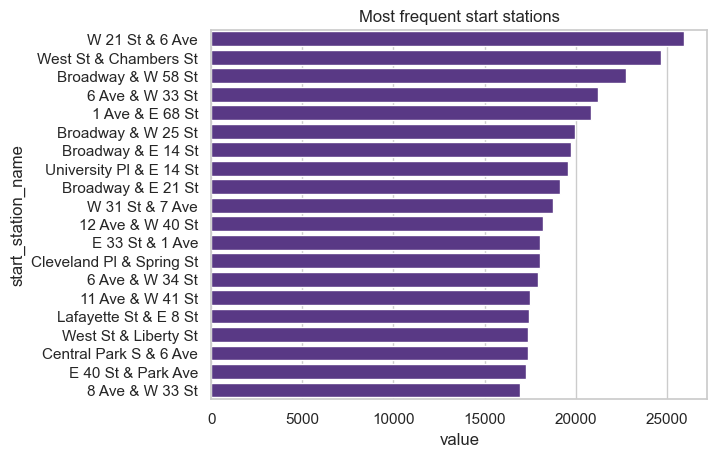

In [66]:
sns.barplot(data = top20, x = 'value', y = 'start_station_name')
plt.title("Most frequent start stations")
plt.show()

#### The above plot does not show any color variations.
#### Recreate plot with new palette colors

C:\Users\Barb\AppData\Local\Temp\ipykernel_4364\2839758038.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = top20, x = 'value', y = 'start_station_name', palette=("Blues_r"))


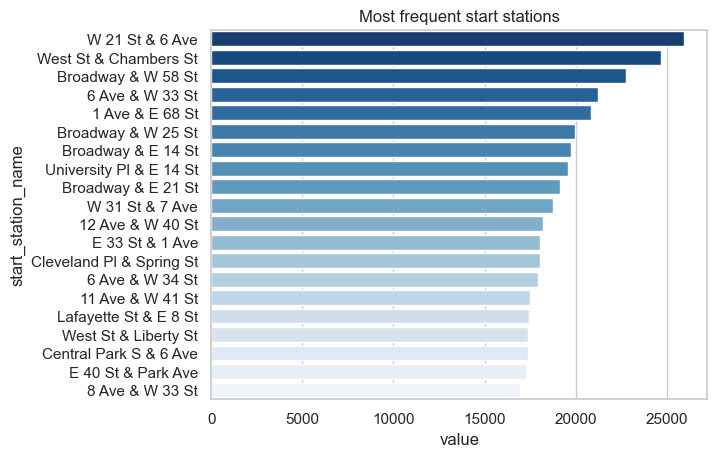

In [67]:
sns.barplot(data = top20, x = 'value', y = 'start_station_name', palette=("Blues_r"))
plt.title("Most frequent start stations")
plt.show()

## Line plot
#### Recreate dual-axis line plot: (AvgTemp-vs-Date) & (Bike_Trip_Counts-vs-Date)

#### Create Table of avgTemp-vs-date:  df_no_dups (final df name)

##### Slim down the df_no_dups dataframe by (1) dropping unnecessary columns and (2) Dropping duplicates

      ##### (1) Drop unnecessary columns - only keep date and avgTemp columns

In [78]:
df_drop_col = df.drop(columns = ['value', '_merge', 'ride_id', 'rideable_type', 'started_at', 'ended_at', 'start_station_name', 'start_station_id', 'end_station_name', 'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng', 'member_casual'])

In [79]:
df_drop_col.head()

,date,avgTemp
25092672,2022-10-20,11.1
850261,2022-01-19,3.2
25461273,2022-10-31,14.4
8836007,2022-05-02,12.1
20383470,2022-09-20,23.2


     ##### (2) Remove duplicate rows

In [80]:
# find duplicate rows for df containing only date and avgTemp
                 #1st - Find the total # of rows of df_drop_col

In [81]:
df_drop_col.shape

(5967761, 2)

In [82]:
                 #2nd - find the number of duplicate rows

In [83]:
df_dups = df_drop_col[df_drop_col.duplicated()]

In [84]:
df_dups.shape

(5967385, 2)

In [85]:
                  #3rd - create df_no_dups which comtains no duplicates

In [86]:
df_no_dups = df_drop_col.drop_duplicates()

In [77]:
df_no_dups.shape

(5293817, 4)

In [19]:
df_no_dups.head(5)

,date,avgTemp
25092672,2022-10-20,11.1
850261,2022-01-19,3.2
25461273,2022-10-31,14.4
8836007,2022-05-02,12.1
20383470,2022-09-20,23.2


In [20]:
# Save avgTemp-vs-Date (df_no_dups)/ 376 rows
# df (1) has no index set, (2) only columns' date and avgTemp, and (3) duplicates removed

# df_no_dups.to_csv('avgTemp-Date.csv')

       ##### (3) ID missing values

In [21]:
                 #Find # of missing avgTemp values

df_no_dups['avgTemp'].isnull().sum()

11

In [22]:
                  #create subset of df_datesort that contains only missing values

df_nan = df_no_dups[df_no_dups['avgTemp'].isnull() == True]
df_nan

,date,avgTemp
825981,2021-12-31,NaN
134850,2021-12-29,NaN
243440,2021-11-16,NaN
1099488,2021-12-19,NaN
2278343,2021-04-30,NaN
834170,2021-12-30,NaN
1887411,2021-12-08,NaN
2167335,2021-03-14,NaN
546228,2021-12-26,NaN
10829245,2021-03-11,NaN


In [23]:
                #What should I do with missing values? Ignore, impute or remove
                     # I choose to REMOVE
                     # Before REMOVING, perform the merge first and look at data

####  Create table of bike_trips_per_day-vs-Date

    ##### Aggregate Bike Trips

In [24]:
# Groupby the count of the trips 

df_group = pd.DataFrame(df.groupby(['date'])['ride_id'].count()).reset_index()

In [25]:
df_group.head()

,date,ride_id
0,2021-03-11,1
1,2021-03-14,1
2,2021-04-30,1
3,2021-08-16,1
4,2021-11-16,1


In [26]:
df_group.rename(columns = {'ride_id':'bike_rides_daily'}, inplace = True)

In [27]:
df_group.head()

,date,bike_rides_daily
0,2021-03-11,1
1,2021-03-14,1
2,2021-04-30,1
3,2021-08-16,1
4,2021-11-16,1


In [28]:
df_group.shape

(376, 2)

In [29]:
df_group.dtypes

date                object
bike_rides_daily     int64
dtype: object

In [30]:
# Save bike_rides_daily-vs-Date (df_group)/ 376 rows
# df has (1) no index set, (2) only columns' date and bike_rides_daily, and (3) bike rides grouped by day


# df_group.to_csv('bike_rides_daily-Date.csv')

In [31]:
#Find missing ride_id values

df_group.isnull().sum()

date                0
bike_rides_daily    0
dtype: int64

#### Merge trip aggregations (df_group) and temperatures (df_no_dups)
##### Make sure datatypes match for date

In [32]:
df_no_dups.dtypes

date        object
avgTemp    float64
dtype: object

In [33]:
      #Before merging, I need to change the datatype of the date column in df_group to match that of df_no_dups


In [34]:
df_group['date'] = pd.to_datetime(df_group['date'], format = '%Y-%m-%d')
df_no_dups['date'] = pd.to_datetime(df_no_dups['date'], format = '%Y-%m-%d')

C:\Users\Barb\AppData\Local\Temp\ipykernel_4364\445259861.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_dups['date'] = pd.to_datetime(df_no_dups['date'], format = '%Y-%m-%d')


In [35]:
df_group.dtypes

date                datetime64[ns]
bike_rides_daily             int64
dtype: object

In [36]:
df_no_dups.dtypes

date       datetime64[ns]
avgTemp           float64
dtype: object

#### MERGE
##### Then (1) Set date as index and (2) Sort by date

In [37]:
df2 = df_no_dups.merge(df_group, on = 'date', how = 'outer')                      #Both df_no_dups & df_group have 376 values 

In [38]:
df_temp = df2.set_index('date')

In [39]:
df_datesort = df_temp.sort_values(by = 'date')

In [40]:
df_datesort.head(10)

,avgTemp,bike_rides_daily
date,,
2021-03-11,NaN,1
2021-03-14,NaN,1
2021-04-30,NaN,1
2021-08-16,NaN,1
2021-11-16,NaN,1
2021-12-08,NaN,1
2021-12-19,NaN,1
2021-12-26,NaN,1
2021-12-29,NaN,1


     ##### REMOVE rows with missing temperatures because they are in the year 2021
     ##### Create new df w/o missing temps

In [41]:
df_temp_clean = df_datesort[df_datesort['avgTemp'].isnull() == False]
df_temp_clean.shape

(365, 2)

In [42]:
df_temp_clean.head()

,avgTemp,bike_rides_daily
date,,
2022-01-01,11.6,4028
2022-01-02,11.4,8571
2022-01-03,1.4,6617
2022-01-04,-2.7,7487
2022-01-05,3.2,6752


In [87]:
df_temp_clean.reset_index(level=0, inplace=True)

In [89]:
df_dual_axis = df_temp_clean

In [90]:
df_dual_axis

,date,avgTemp,bike_rides_daily
0,2022-01-01,11.6,4028
1,2022-01-02,11.4,8571
2,2022-01-03,1.4,6617
3,2022-01-04,-2.7,7487
4,2022-01-05,3.2,6752
...,...,...,...
360,2022-12-27,-0.7,6584
361,2022-12-28,3.4,8872
362,2022-12-29,6.4,10252
363,2022-12-30,9.3,12512


In [91]:
df_dual_axis.to_csv('dual_axis.csv')

In [43]:
#print("Shape of January 1st is", df_temp_clean[df_temp_clean['date'] == '2022-01-01'].shape) # Check 
#print("Shape of January 2nd is", df_temp_clean[df_temp_clean['date'] == '2022-01-02'].shape) # Second check 

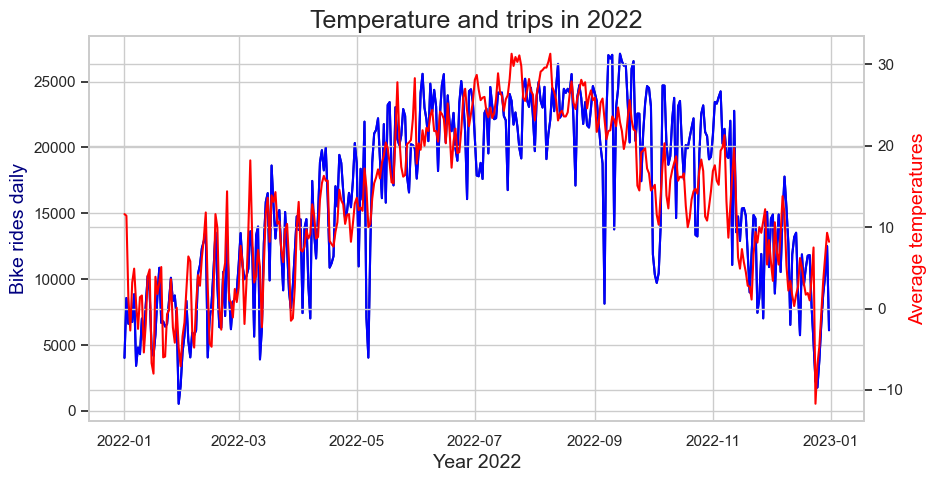

In [44]:
# Create figure and axis objects with subplots()

fig,ax = plt.subplots(figsize=(10, 5))

# Make a plot of the bike rides
ax.plot(df_temp_clean['bike_rides_daily'],color = "navy")

sns.lineplot(data = df_temp_clean['bike_rides_daily'], color = "b")
ax.set_xlabel("Year 2022", fontsize = 14) # set x-axis label
ax.set_ylabel("Bike rides daily",color = "navy", fontsize = 14) # set y-axis label

# Here is where we create the dual axis - initialize a twin object for two different y-axis on the sample plot
ax2 = ax.twinx()

# Make a plot with the temperatues on the y-axis using second axis object
sns.lineplot(data = df_temp_clean['avgTemp'], color="r", ax=ax2)
ax2.set_ylabel("Average temperatures", color = "red",fontsize=14)
plt.title('Temperature and trips in 2022', fontsize = 18)
plt.show()

### Box plots

In [45]:
df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
date                   object
avgTemp               float64
_merge                 object
value                   int64
dtype: object

In [46]:
df['member_casual']

25092672    member
850261      member
25461273    casual
8836007     member
20383470    member
             ...  
2981383     member
12914510    member
1810052     member
13538892    member
1534846     member
Name: member_casual, Length: 5967761, dtype: object

In [47]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avgTemp', '_merge', 'value'],
      dtype='object')

#### Slim down dataframe by dropping unnecessary columns
#### Drop duplicates? - NA

In [48]:
#drop unnecessary columns

df_drop_col = df.drop(columns = ['ride_id', 'rideable_type', 'started_at', 'ended_at', 'start_station_name', 'start_station_id', 'end_station_name', 'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng', 'date', '_merge', 'value'])

In [49]:
df_drop_col.head()


,member_casual,avgTemp
25092672,member,11.1
850261,member,3.2
25461273,casual,14.4
8836007,member,12.1
20383470,member,23.2


In [50]:
df_drop_col.shape


(5967761, 2)

#### Don't need date column to be index of dataframe in copy

#### Check for missing values - (1) Sort avgTemp in order; (2) Find # of missing values & create subset of missing values

In [51]:
           # 1) Sort avgTemp values

In [52]:
df_datesort = df_drop_col.sort_values(by = 'avgTemp')

In [53]:
df_datesort

,member_casual,avgTemp
28767020,member,-11.7
29409804,member,-11.7
28336697,member,-11.7
28947307,member,-11.7
28257958,member,-11.7
...,...,...
821918,member,NaN
719929,casual,NaN
533419,casual,NaN
823544,casual,NaN


In [54]:
           # 2) Find number of missing avgTemp and member_casual values and create subset of missing values

df_datesort.isnull().sum()

member_casual      0
avgTemp          119
dtype: int64

In [55]:
                   #create subset of df_datesort that contains only missing temp values

df_nan = df_datesort[df_datesort['avgTemp'].isnull() == True]
df_nan

,member_casual,avgTemp
825981,casual,NaN
832973,casual,NaN
841004,member,NaN
837888,casual,NaN
29748,casual,NaN
...,...,...
821918,member,NaN
719929,casual,NaN
533419,casual,NaN
823544,casual,NaN


In [56]:
                    #create subset of df_datesort that contains only missing member_casual values

df_nan2 = df_datesort[df_datesort['member_casual'].isnull() == True]
df_nan2

,member_casual,avgTemp


In [57]:
# So, 144/5967761 (.0024%) temps are missing
# What do I with the missing data? Ignore them, impute the values or remove the missing data?
# I will remove the missing values since it will not effect the overall results very much

#### create df w/o missing avgTemps

In [58]:
df_temp_memb_clean = df_datesort[df_datesort['avgTemp'].isnull() == False]

In [59]:
df_temp_memb_clean.shape

(5967642, 2)

In [60]:
df_temp_memb_clean.head()

,member_casual,avgTemp
28767020,member,-11.7
29409804,member,-11.7
28336697,member,-11.7
28947307,member,-11.7
28257958,member,-11.7


C:\Users\Barb\AppData\Local\Temp\ipykernel_4364\1925224326.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'member_casual', y = 'avgTemp', data = df, palette = {'member': 'royalblue', 'casual': 'pink'})


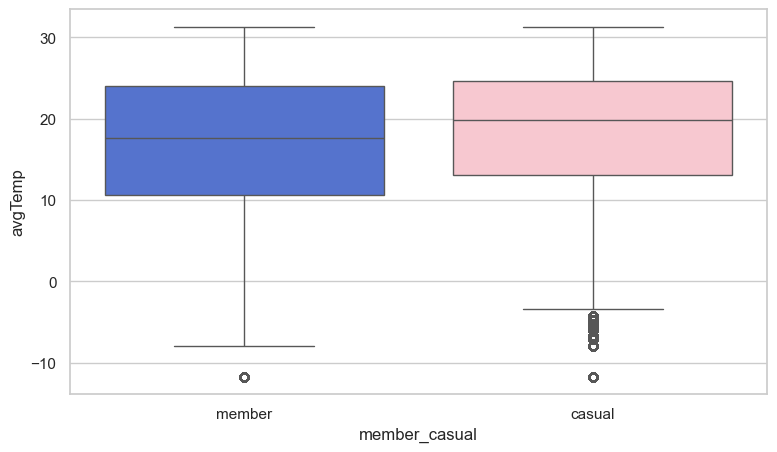

In [61]:
plt.figure(figsize=(9,5))
sns.boxplot(x = 'member_casual', y = 'avgTemp', data = df, palette = {'member': 'royalblue', 'casual': 'pink'})
plt.show()

The variables follow a similar distribution. However the casual user is shifted more downward and has more outliers. The median for the casual user is 20 degrees while the median for the member is about 17 degrees.

### FacetGrids

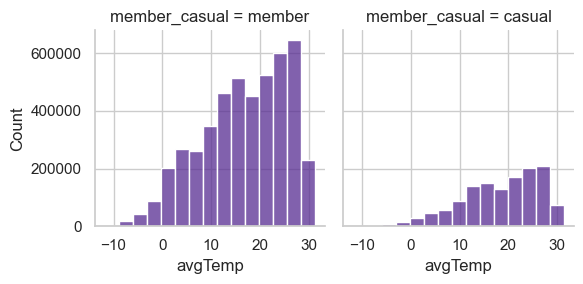

In [62]:
grid = sns.FacetGrid(df, col = "member_casual")
grid.map(sns.histplot, "avgTemp", bins = 15)
plt.show()

The above facetgrid shows the average temperatures when the customer (member and casual) rode the bikes. I notice that both histograms have the same basic shapes.
However, a greater % of the members ride their bikes below 0 degrees Celcius. 